In [1]:
#data setting
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

Text(0.5, 1.0, 'figure scatter')

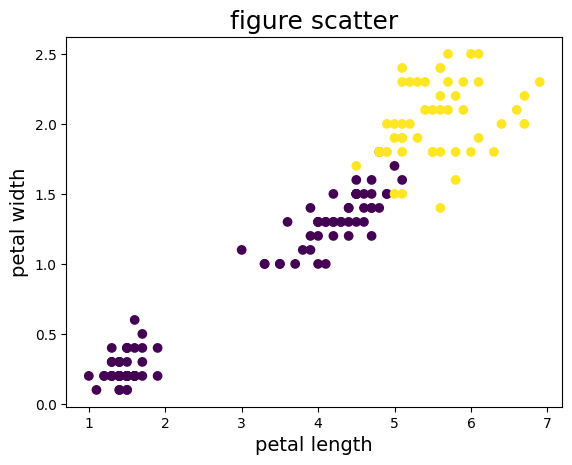

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

plt.figure()
plt.scatter(X[:, 0 ], X[:, 1], c = y)
plt.xlabel("petal length", fontsize = 14)
plt.ylabel("petal width", fontsize = 14)
plt.title("figure scatter", fontsize = 18)

In [14]:
#pipeline 생성
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=100, loss = 'hinge', max_iter = 50000)),
])

In [15]:
svm_clf.fit(X, y)
print(svm_clf.named_steps["linear_svc"].coef_)
print(svm_clf.named_steps['linear_svc'].intercept_)

[[6.39809888 4.83460109]]
[-6.97547707]


In [16]:
# 0번째 class
svm_clf.predict([[3.8 , 1.7]])

array([0.])

[0.]
[0.]


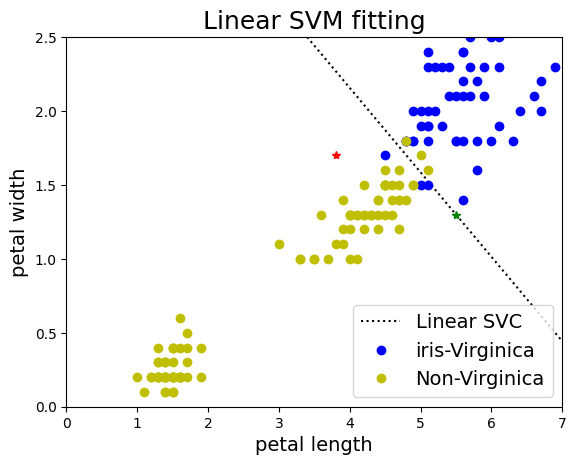

In [17]:
w = -svm_clf.named_steps["linear_svc"].coef_[0, 0]/svm_clf.named_steps["linear_svc"].coef_[0, 1]
b = -svm_clf.named_steps["linear_svc"].intercept_[0]/svm_clf.named_steps["linear_svc"].coef_[0, 1]

line = svm_clf.named_steps["scaler"].inverse_transform([[-5, (-5*w)+b], [5, (5*w)+b]])

plt.figure()
plt.plot(line[:, 0], line[:, 1], "k:", label = "Linear SVC")
plt.plot(X[:, 0][y==1], X[:, 1][y==1],'bo', label ='iris-Virginica')
plt.plot(X[:, 0][y==0], X[:, 1][y==0],'yo', label ='Non-Virginica')
plt.plot(3.8, 1.7, 'r*')
print(svm_clf.predict([[3.8 , 1.7]]))

#homework#3
plt.plot(5.5, 1.3, 'g*')
print(svm_clf.predict([[5.5, 1.3]]))

plt.xlabel("petal length", fontsize = 14)
plt.ylabel("petal width", fontsize = 14)
plt.legend(loc = "lower right", fontsize = 14)
plt.title("Linear SVM fitting", fontsize = 18)
plt.axis([0, 7, 0, 2.5])
plt.show()